In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import sys
import sklearn
import io
import random
import time
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

In [154]:
data = pd.read_csv('data.csv')

In [155]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [156]:
print('Label Distribution Training Set :')
print(data['label'].value_counts())

Label Distribution Training Set :
normal     67343
neptune    41214
smurf       2646
back         956
pod          201
land          18
Name: label, dtype: int64


In [157]:
print('Dataset :')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat =len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
        
print()
print('Distributed of Categories in Service :')
print(data['service'].value_counts().sort_values(ascending=False).head())

Dataset :
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 10 categories
Feature 'label' has 6 categories

Distributed of Categories in Service :
http        40304
private     16061
domain_u     9034
smtp         7270
ftp_data     6193
Name: service, dtype: int64


In [158]:
protocol_type_columns=['protocol_type']
protocol_type_values = data[protocol_type_columns]
protocol_type_values.head()

,protocol_type
0,tcp
1,udp
2,tcp
3,tcp
4,tcp


In [159]:
service_columns=['service']
service_values = data[service_columns]
service_values.head()

,service
0,ftp_data
1,other
2,private
3,http
4,http


In [160]:
flag_columns=['flag']
flag_values = data[flag_columns]
flag_values.head()

,flag
0,SF
1,SF
2,S0
3,SF
4,SF


In [161]:
# protocol_type
unique_protocol = sorted(data.protocol_type.unique())
string1 = 'protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
print(unique_protocol2)

# isi secara bersamaan
dumcols_protocol_type = unique_protocol2
# + unique_service2 + unique_flag2

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp']


In [162]:
# service
unique_service = sorted(data.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
print(unique_service2)

dumcols_service = unique_service2

['service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat', 'service_telnet', 'service_t

In [163]:
# flag
unique_flag = sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]
print(unique_flag2)

dumcols_flag = unique_flag2

['flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']


In [164]:
# konversi fitur katogorial menjadi numerik
protocol_type_values_enc = protocol_type_values.apply(LabelEncoder().fit_transform)
print('Sebelum dikonversi')
print(protocol_type_values.head())
print()
print('Setelah dikonversi')
print(protocol_type_values_enc.head())

Sebelum dikonversi
  protocol_type
0           tcp
1           udp
2           tcp
3           tcp
4           tcp

Setelah dikonversi
   protocol_type
0              1
1              2
2              1
3              1
4              1


In [165]:
# konversi fitur katogorial menjadi numerik
service_values_enc = service_values.apply(LabelEncoder().fit_transform)
print('Sebelum dikonversi')
print(service_values.head())
print()
print('Setelah dikonversi')
print(service_values_enc.head())

Sebelum dikonversi
    service
0  ftp_data
1     other
2   private
3      http
4      http

Setelah dikonversi
   service
0       19
1       40
2       44
3       22
4       22


In [166]:
# konversi fitur katogorial menjadi numerik
flag_values_enc = flag_values.apply(LabelEncoder().fit_transform)
print('Sebelum dikonversi')
print(flag_values.head())
print()
print('Setelah dikonversi')
print(flag_values_enc.head())

Sebelum dikonversi
  flag
0   SF
1   SF
2   S0
3   SF
4   SF

Setelah dikonversi
   flag
0     8
1     8
2     4
3     8
4     8


In [167]:
data['protocol_type'] = protocol_type_values_enc

In [168]:
data['service'] = service_values_enc

In [169]:
data['flag'] = flag_values_enc

In [170]:
# # gabungkan data yang sudah diubah ke dataset kembali
# new_data = data.join(data_cat_data)
# new_data.drop('protocol_type', axis = 1, inplace = True)
# new_data.drop('service', axis = 1, inplace = True)
# new_data.drop('flag', axis = 1, inplace = True)

# print(new_data.shape)
print(data)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       19     8        491          0     0   
1              0              2       40     8        146          0     0   
2              0              1       44     4          0          0     0   
3              0              1       22     8        232       8153     0   
4              0              1       22     8        199        420     0   
5              0              1       44     1          0          0     0   
6              0              1       44     4          0          0     0   
7              0              1       44     4          0          0     0   
8              0              1       46     4          0          0     0   
9              0              1       44     4          0          0     0   
10             0              1       44     1          0          0     0   
11             0              1       44     4          0       

In [171]:
label_data = data['label']

# ubah kolom label
new_label_data = label_data.replace({'normal' : 0, 'back' : 1, 'land' : 1, 'pod' : 1, 'neptune' : 1, 'smurf' : 1})
# tambahkan kolom label baru kedalam dataet
data['label'] = new_label_data


In [172]:
print(data)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       19     8        491          0     0   
1              0              2       40     8        146          0     0   
2              0              1       44     4          0          0     0   
3              0              1       22     8        232       8153     0   
4              0              1       22     8        199        420     0   
5              0              1       44     1          0          0     0   
6              0              1       44     4          0          0     0   
7              0              1       44     4          0          0     0   
8              0              1       46     4          0          0     0   
9              0              1       44     4          0          0     0   
10             0              1       44     1          0          0     0   
11             0              1       44     4          0       

In [174]:
fitur = data.drop('label', axis = 1)
target = data['label']
fitur.shape, target.shape

((112378, 41), (112378,))

In [175]:
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size = 0.2, random_state = 0)

In [176]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [177]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [178]:
X_train_T.duplicated().sum()

0

In [179]:
duplicated_features = X_train_T.duplicated()

In [180]:
print(duplicated_features.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [181]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape

((89902, 29), (22476, 29))

In [182]:
mi = mutual_info_classif(X_train_unique, y_train) 
len(mi)

29

In [183]:
mi[: 10]

array([0.03676619, 0.07228328, 0.48067354, 0.48446757, 0.56430592,
       0.42983996, 0.00896717, 0.28841024, 0.00615671, 0.00374924])

In [184]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [185]:
mi.sort_values(ascending=False, inplace = True)

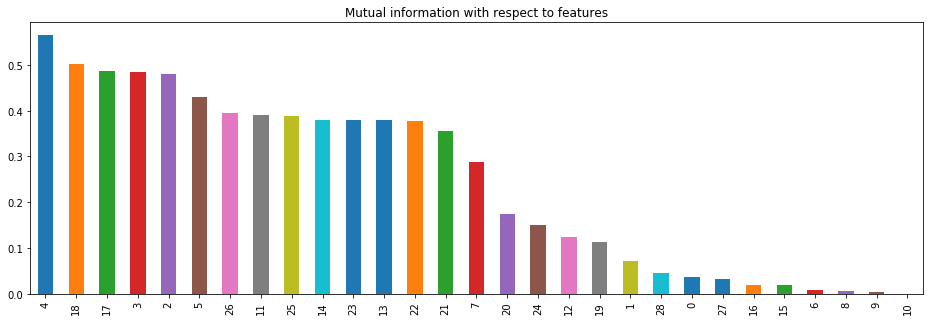

In [186]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()